INFORMASI DATASET IRIS

5 Data Pertama:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), in

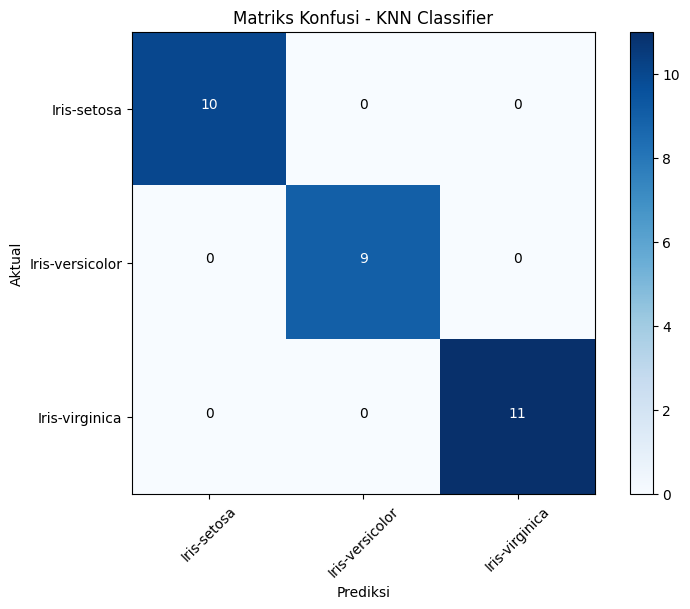

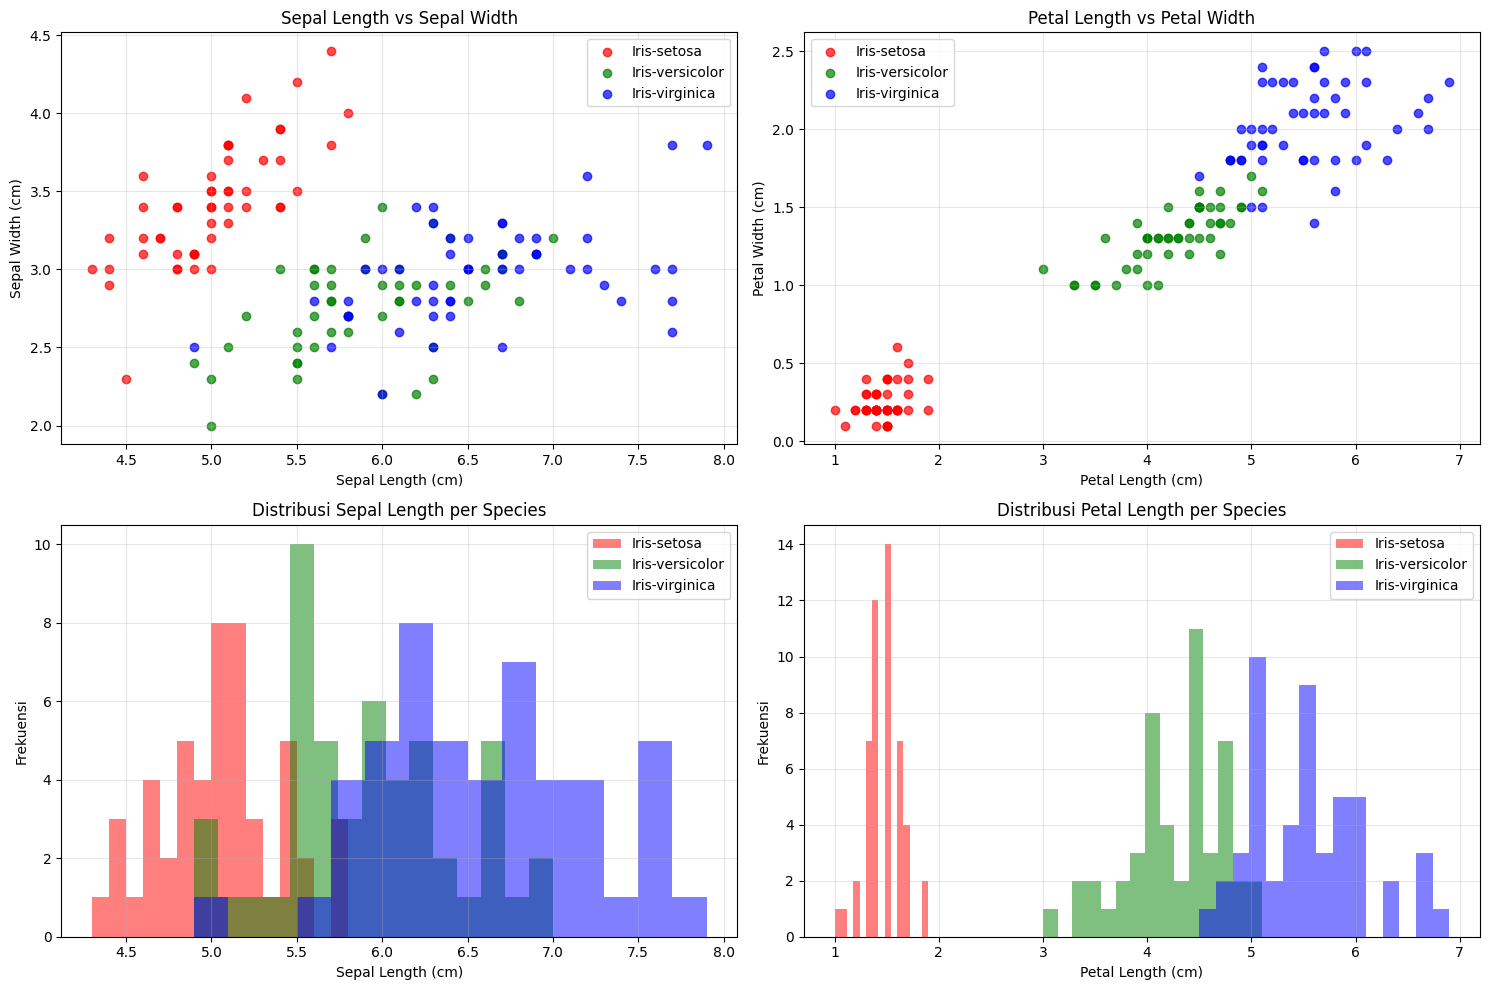


CONTOH PREDIKSI BUNGA IRIS BARU

Contoh 1 (5.1, 3.5, 1.4, 0.2):
   Prediksi: Iris-setosa
   Harapan: Iris-setosa

Contoh 2 (6.0, 2.7, 4.1, 1.0):
   Prediksi: Iris-versicolor
   Harapan: Iris-versicolor

Contoh 3 (6.9, 3.1, 5.4, 2.1):
   Prediksi: Iris-virginica
   Harapan: Iris-virginica

MENCARI NILAI K OPTIMAL


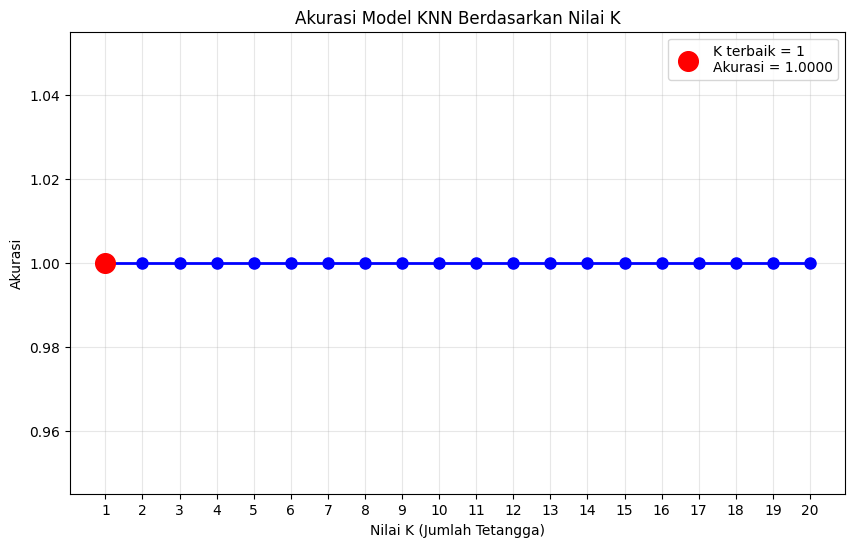


Nilai K terbaik: 1 dengan akurasi: 1.0000

ANALISIS HASIL

Kesimpulan:
1. Model KNN dapat mengklasifikasikan bunga iris dengan akurasi tinggi
2. Fitur Petal (mahkota) lebih informatif daripada Sepal (kelopak)
3. Iris-setosa mudah dibedakan dari dua spesies lainnya
4. Nilai K optimal biasanya antara 3-10 untuk dataset ini


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('Iris.csv')

print("=" * 60)
print("INFORMASI DATASET IRIS")
print("=" * 60)
print("\n5 Data Pertama:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nJumlah Data per Species:")
print(df['Species'].value_counts())
df = df.drop('Id', axis=1)
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n" + "=" * 60)
print("PEMBAGIAN DATA")
print("=" * 60)
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Jumlah fitur: {X_train.shape[1]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\n" + "=" * 60)
print("EVALUASI MODEL K-NEAREST NEIGHBORS")
print("=" * 60)
print(f"Akurasi Model: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
print("\nMatriks Konfusi:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriks Konfusi - KNN Classifier')
plt.colorbar()
classes = model.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], 
                label=species, alpha=0.7, color=colors[species])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 2)
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], 
                label=species, alpha=0.7, color=colors[species])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 3)
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.hist(subset['SepalLengthCm'], alpha=0.5, label=species, bins=15, 
             color=colors[species])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Sepal Length per Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 4)
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.hist(subset['PetalLengthCm'], alpha=0.5, label=species, bins=15,
             color=colors[species])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Petal Length per Species')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n" + "=" * 60)
print("CONTOH PREDIKSI BUNGA IRIS BARU")
print("=" * 60)
new_flower_1 = pd.DataFrame({
    'SepalLengthCm': [5.1],
    'SepalWidthCm': [3.5],
    'PetalLengthCm': [1.4],
    'PetalWidthCm': [0.2]
})

new_flower_2 = pd.DataFrame({
    'SepalLengthCm': [6.0],
    'SepalWidthCm': [2.7],
    'PetalLengthCm': [4.1],
    'PetalWidthCm': [1.0]
})

new_flower_3 = pd.DataFrame({
    'SepalLengthCm': [6.9],
    'SepalWidthCm': [3.1],
    'PetalLengthCm': [5.4],
    'PetalWidthCm': [2.1]
})
new_flower_1_scaled = scaler.transform(new_flower_1)
new_flower_2_scaled = scaler.transform(new_flower_2)
new_flower_3_scaled = scaler.transform(new_flower_3)

prediction_1 = model.predict(new_flower_1_scaled)
prediction_2 = model.predict(new_flower_2_scaled)
prediction_3 = model.predict(new_flower_3_scaled)

print(f"\nContoh 1 (5.1, 3.5, 1.4, 0.2):")
print(f"   Prediksi: {prediction_1[0]}")
print(f"   Harapan: Iris-setosa")

print(f"\nContoh 2 (6.0, 2.7, 4.1, 1.0):")
print(f"   Prediksi: {prediction_2[0]}")
print(f"   Harapan: Iris-versicolor")

print(f"\nContoh 3 (6.9, 3.1, 5.4, 2.1):")
print(f"   Prediksi: {prediction_3[0]}")
print(f"   Harapan: Iris-virginica")

# Mencari nilai k terbaik
print("\n" + "=" * 60)
print("MENCARI NILAI K OPTIMAL")
print("=" * 60)

k_values = range(1, 21)
accuracies = []

for k_val in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k_val)
    model_k.fit(X_train_scaled, y_train)
    y_pred_k = model_k.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nilai K (Jumlah Tetangga)')
plt.ylabel('Akurasi')
plt.title('Akurasi Model KNN Berdasarkan Nilai K')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
plt.scatter(best_k, best_acc, color='red', s=200, zorder=5, 
            label=f'K terbaik = {best_k}\nAkurasi = {best_acc:.4f}')
plt.legend()

plt.show()

print(f"\nNilai K terbaik: {best_k} dengan akurasi: {best_acc:.4f}")

print("\n" + "=" * 60)
print("ANALISIS HASIL")
print("=" * 60)
print("\nKesimpulan:")
print("1. Model KNN dapat mengklasifikasikan bunga iris dengan akurasi tinggi")
print("2. Fitur Petal (mahkota) lebih informatif daripada Sepal (kelopak)")
print("3. Iris-setosa mudah dibedakan dari dua spesies lainnya")
print("4. Nilai K optimal biasanya antara 3-10 untuk dataset ini")